In [1]:
##importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
#Loading the dataset into pandas Dataframe
loan_dataset = pd.read_csv('Loan.csv')

In [4]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#checking the number of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
#Checking the numbers of missing values in each columns
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_dataset = loan_dataset.dropna()

In [8]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
loan_dataset.shape

(480, 13)

In [10]:
#Label Encoding
loan_dataset['Loan_Status'] = np.where(loan_dataset['Loan_Status']== 'Y', 1,0)

In [11]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
loan_dataset['Dependents'].replace({'3+': '4'}, inplace = True)

In [14]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [15]:
#Visualizing the Data
loan_dataset.corr()

C:\Users\DELL INSPIRON 15\AppData\Local\Temp\ipykernel_8568\2035277718.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_dataset.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


C:\Users\DELL INSPIRON 15\AppData\Local\Temp\ipykernel_8568\3939478519.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_dataset.corr())


<Axes: >

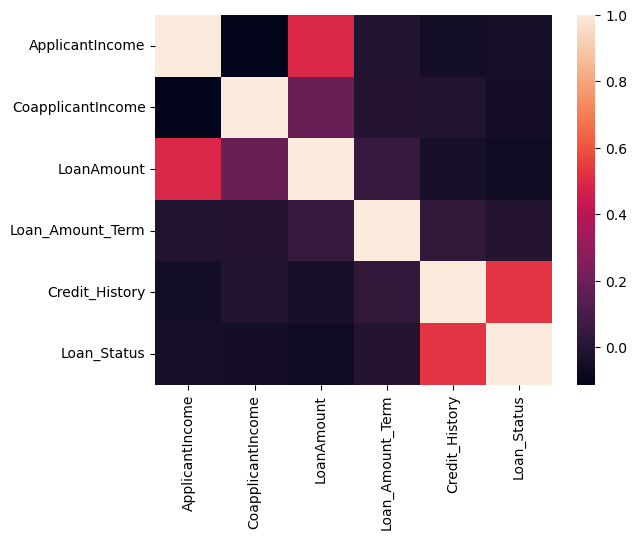

In [16]:
sns.heatmap(loan_dataset.corr())

In [17]:
#Converting Categorical columns to numerical Values
loan_dataset['Married'].replace({'Yes':1, 'No':0}, inplace = True)

In [18]:
loan_dataset['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [19]:
loan_dataset['Gender'].replace({'Male':1, 'Female': 0}, inplace = True)
loan_dataset['Self_Employed'].replace({'Yes':1, 'No': 0}, inplace = True)
loan_dataset['Property_Area'].replace({'Rural':0, 'Semiurban': 1, 'Urban':2}, inplace = True)
loan_dataset['Education'].replace({'Graduate':1, 'Not Graduate': 0}, inplace = True)

In [20]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [21]:
#Separating the data and label

X = loan_dataset.drop(columns= ['Loan_ID', 'Loan_Status'],axis =1)
y = loan_dataset['Loan_Status']

In [22]:
#Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 2) 

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
#Training the model using SVM
classifier = svm.SVC(kernel='linear')

In [26]:
#Training the support vector machine model
classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [29]:
#Model Evaluation
#Accuracy score on training data
X_train_pred = classifier.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_pred, y_train)
print('Accuracy on training data:', training_data_accuracy)

Accuracy on training data: 0.8055555555555556


In [30]:
#Accuracy score on training data
X_test_pred = classifier.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
print('Accuracy on test data:', test_data_accuracy)

Accuracy on test data: 0.8333333333333334
